# Title: LiH on Quantum Computer
## Calculate the ground state energy of LiH molecule and plot the energy curve as a function of bond length

We first need to import all necessary libraries and packages that will be used in the calculation. This includes both general purpose libraries like `numpy` and `matplotlib`, as well as specialized libraries for quantum computations like `pyscf` and `qiskit`.

the code is from https://github.com/qiskit-community/qiskit-nature-pyscf 


![Alt text](../../../workspace/screenshots/Screenshot%202023-05-23%20at%2013.05.18.png)

## Set up the molecule and quantum variables

In this cell, we specify the parameters for the LiH molecule. This includes the number of orbitals (`norb`), the number of alpha and beta electrons (`nalpha` and `nbeta`), and the total number of electrons (`nelec`). We also prepare a range of interatomic distances for which we'll compute the ground state energy.

In [9]:

# molecule specification
norb = 2
nalpha, nbeta = 1, 1
nelec = nalpha + nbeta

# prepare the interatomic distance range
distances = np.linspace(0.5, 4.0, 35)

## Main loop for computing ground state energies

In this cell, we perform the main computation. For each interatomic distance, we define a molecular system with `pyscf`, then set up a quantum circuit for the molecule using `qiskit`. We use the Variational Quantum Eigensolver (VQE) method to compute the ground state energy of the molecule. The computed energies are stored in the `energies` list.

In [10]:
# initialize the list for storing energies
energies = []

for d in distances:
    # define the molecule
    mol = gto.M(atom="Li 0 0 0; H 0 0 " + str(d), basis="sto-3g")
    h_f = scf.RHF(mol).run()
    cas = mcscf.CASCI(h_f, norb, nelec)

    # define the mapper and ansatz
    mapper = ParityMapper(num_particles=(nalpha, nbeta))
    ansatz = UCCSD(
        norb,
        (nalpha, nbeta),
        mapper,
        initial_state=HartreeFock(
            norb,
            (nalpha, nbeta),
            mapper,
        ),
    )

    # define the VQE and the algorithm
    vqe = VQE(Estimator(), ansatz, SLSQP())
    vqe.initial_point = np.zeros(ansatz.num_parameters)
    algorithm = GroundStateEigensolver(mapper, vqe)
    cas.fcisolver = QiskitSolver(algorithm)
    
    # compute the ground state energy
    res = cas.run()
    
    # print intermediate result
    print("Distance:", d, "Energy:", res.e_tot)
    
    # store the ground state energy
    energies.append(res.e_tot)

converged SCF energy = -7.02841009454193
CASCI E = -7.02905199516753  E(CI) = -0.968587020851601
Distance: 0.5 Energy: -7.029051995167526
converged SCF energy = -7.30605031275521
CASCI E = -7.3062785527267  E(CI) = -1.03754681219619
Distance: 0.6029411764705882 Energy: -7.306278552726704
converged SCF energy = -7.49494923396052
CASCI E = -7.49511691775791  E(CI) = -1.09523400347015
Distance: 0.7058823529411764 Energy: -7.495116917757913
converged SCF energy = -7.62511698867515
CASCI E = -7.62525977818445  E(CI) = -1.1336051440901
Distance: 0.8088235294117647 Energy: -7.6252597781844464
converged SCF energy = -7.71429057222577
CASCI E = -7.71442419856313  E(CI) = -1.15311311711022
Distance: 0.9117647058823529 Energy: -7.714424198563133
converged SCF energy = -7.77455557777776
CASCI E = -7.77468991152598  E(CI) = -1.15760198542799
Distance: 1.0147058823529411 Energy: -7.774689911525982
converged SCF energy = -7.81440726013497
CASCI E = -7.81454880284286  E(CI) = -1.15136617367582
Distanc

## Plotting the dissociation curve

Finally, we plot the dissociation curve of LiH. The minimum energy corresponds to the equilibrium bond length of the molecule.
The dissociation curve shows how the energy changes with the distance between the lithium and hydrogen atoms. This curve is an important characteristic of the molecule and can be used to understand its behavior, for instance, in the context of battery materials.


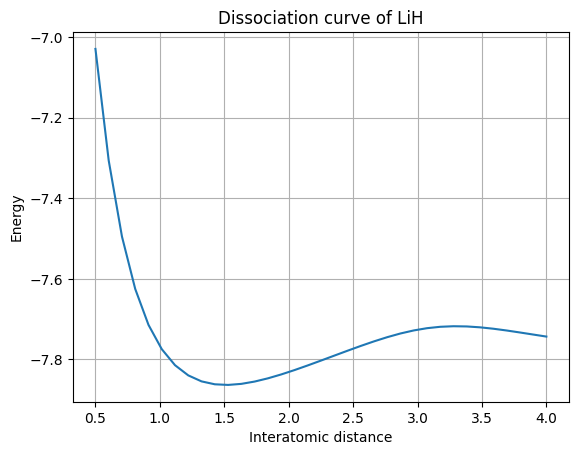

In [11]:
# plot the results
plt.plot(distances, energies)
plt.title('Dissociation curve of LiH')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.grid()
plt.show()
